In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os

In [5]:
def manual_bilateral_filter(img, d, sigma_s, sigma_r):
    # Create Output Image
    h, w = img.shape
    output = np.zeros((h, w), dtype=np.float32)
    
    # Pad image to handle borders
    pad_size = d // 2
    padded_img = cv2.copyMakeBorder(img, pad_size, pad_size, pad_size, pad_size, cv2.BORDER_REFLECT)
    
    # Pre-compute Spatial Gaussian Weight (Constant for all pixels)
    coords = np.arange(-pad_size, pad_size + 1)
    x, y = np.meshgrid(coords, coords)
    kernel_s = np.exp(-(x**2 + y**2) / (2 * sigma_s**2))
    
    # Iterate over every pixel (Vectorized inner window)
    print(f"Applying Manual Bilateral Filter ({d}x{d})... This may take a moment.")
    
    for i in range(h):
        for j in range(w):
            # Extract the local window (neighborhood)
            window = padded_img[i:i+d, j:j+d]
            
            # Get the center pixel intensity
            center_intensity = padded_img[i + pad_size, j + pad_size]
            
            # Compute Range Kernel (Intensity Difference)
            intensity_diff = window - center_intensity
            kernel_r = np.exp(-(intensity_diff**2) / (2 * sigma_r**2))
            
            # Combine Weights (Spatial * Range)
            weight = kernel_s * kernel_r
            
            # Normalize and Sum
            normalization = np.sum(weight)
            output[i, j] = np.sum(weight * window) / normalization
            
    return output.astype(np.uint8)

Applying Manual Bilateral Filter (9x9)... This may take a moment.


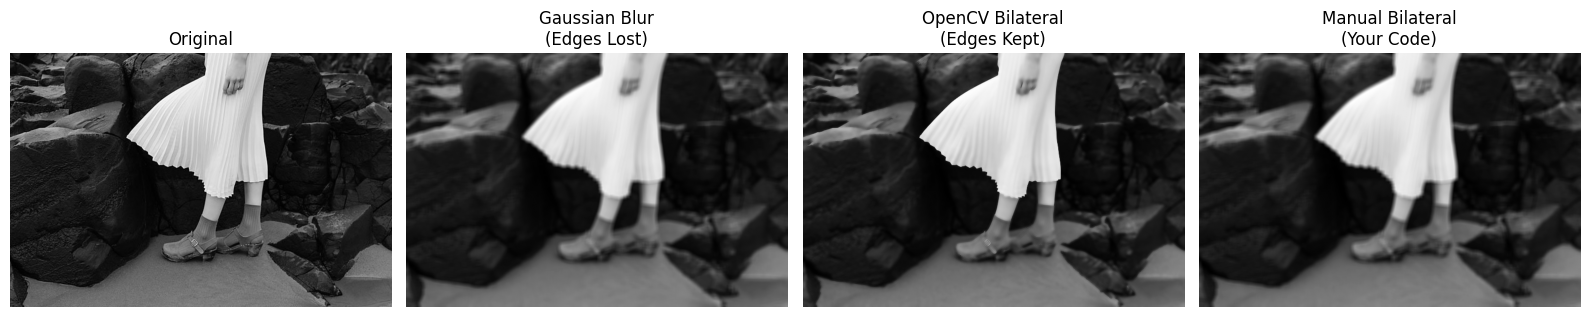

Saved Q10 results.


In [6]:
img_path = '../images/highlights_and_shadows.jpg' # Using the girl image (good for skin smoothing test)
img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)

if img is None:
    print("Error: Load image first.")
else:
    # Parameters
    d = 9          # Diameter
    sigma_s = 75   # Spatial Sigma (Large blur range)
    sigma_r = 75   # Range Sigma (How strictly to respect edges)
    
    # A. Manual Implementation
    img_manual_bi = manual_bilateral_filter(img, d, sigma_s, sigma_r)
    
    # B. OpenCV Gaussian Blur (For comparison)
    img_gaussian = cv2.GaussianBlur(img, (d, d), sigma_s)
    
    # C. OpenCV Bilateral Filter
    img_cv_bi = cv2.bilateralFilter(img, d, sigma_r, sigma_s)
    
    # VISUALIZATION 
    plt.figure(figsize=(16, 6))
    
    # Original
    plt.subplot(1, 4, 1)
    plt.imshow(img, cmap='gray')
    plt.title('Original')
    plt.axis('off')
    
    # Gaussian (Blurry Edges)
    plt.subplot(1, 4, 2)
    plt.imshow(img_gaussian, cmap='gray')
    plt.title('Gaussian Blur\n(Edges Lost)')
    plt.axis('off')
    
    # OpenCV Bilateral (Sharp Edges)
    plt.subplot(1, 4, 3)
    plt.imshow(img_cv_bi, cmap='gray')
    plt.title('OpenCV Bilateral\n(Edges Kept)')
    plt.axis('off')
    
    # Manual Bilateral
    plt.subplot(1, 4, 4)
    plt.imshow(img_manual_bi, cmap='gray')
    plt.title('Manual Bilateral\n(Your Code)')
    plt.axis('off')
    
    plt.tight_layout()
    plt.show()

    output_dir = '../images/outputs'
    cv2.imwrite(os.path.join(output_dir, 'q10_manual_bilateral.jpg'), img_manual_bi)
    cv2.imwrite(os.path.join(output_dir, 'q10_cv_bilateral.jpg'), img_cv_bi)
    print("Saved Q10 results.")